## PROBLEM 4 - PART A

In lecture, we explored the concept of a random walk, using a set of different models of drunks. Here is the code (`randomWalks-segment2.py`) that we used in lecture for Locations, Fields, and the base class of Drunk – you should not have to study this code in detail, since you have seen it in lecture.

Rather than assuming the drunk is walking in a large field, we can assume that the field is enclosed with a fence. When the drunk reaches the fence different things may happen:

 1. **SW** (Solid Walls): The drunk cannot go through the fence. If the drunk sees that his move will make him run into the fence, the drunk will hesitate and not move from the spot.
 2. **SP** (Small Planet): The rightmost edge is connected to the leftmost edge, and the top edge is connected to the bottom edge.
 3. **WW** (Warped World): If the drunk moves past the right-most edge, he ends up on the top edge and vice versa. If the drunk moves past the left edge, he ends up on the bottom edge and vice versa.
 4. **BH** (Back to Home): Whenever the drunk reaches any edge, the drunk is transported back to the center of the world.
 
Here are several routines, where leftEdge is always less than rightEdge, and topEdge is always greater than bottomEdge. `dx` and `dy` can be positive or negative numbers. You can assume the drunk will not land directly on an edge (for example, the case `x + dx == leftEdge` will not happen).

For each of the following code segments, select the type of wall (**SW**, **SP**, **WW**, or **BH**) that is being implemented. Choose option **NA** (None of the Above) to indicate that the code segment does not correctly implement any of the given types of wall.

### Problem 4-1

(1 point possible)<br>

```python
if x+dx > leftEdge and x+dx < rightEdge:
    x += dx
if  y+dy > bottomEdge and y+dy < topEdge:
    y += dy
```
Answer: NA

### Problem 4-2

(1 point possible)<br>
```python
if x+dx < rightEdge and x+dx > leftEdge:
    x += dx
elif x+dx > rightEdge:
    x = leftEdge
elif x+dx < leftEdge:
    x =rightEdge
if y+dy < topEdge and  y+dy > bottomEdge:
    y += dy
elif y+dy > topEdge:
    y = topEdge
elif y+dy < bottomEdge:
    y = bottomEdge
```

Answer: NA

### Problem 4-3

(1 point possible)<br>
```python
if x+dx > leftEdge and x+dx < rightEdge:
    x += dx
elif x+dx > rightEdge:
    x = leftEdge + (x+dx - rightEdge)
elif x+dx < leftEdge:
    x = rightEdge - (leftEdge - (x+dx))

if  y+dy > bottomEdge and y+dy < topEdge:
    y += dy
elif y+dy > topEdge:
    y = bottomEdge + (y+dy - topEdge)
elif y+dy < bottomEdge:
    y = topEdge - (bottomEdge - (y+dy))
```
Answer: SP

### Problem 4-4

(1 point possible)<br>
```python
if x+dx < rightEdge and x+dx > leftEdge:
    x += dx
elif x+dx > rightEdge:
    x = bottomEdge
elif x+dx < leftEdge: 
    x = topEdge
if y+dy < topEdge and  y+dy > bottomEdge:
    y += dy
elif y+dy > topEdge: 
    y = leftEdge
elif y+dy < bottomEdge:  
    y = rightEdge
```
Answer: NA

### Problem 4-5

(1 point possible)<br>
```python
if x+dx > rightEdge:  
    x = y
if x+dx < leftEdge: 
    x = y
if x+dx < rightEdge and x+dx > leftEdge:
    x += dx
if y+dy > topEdge: 
    y = x
if y+dy < bottomEdge:  
    y = x
if y+dy < topEdge and  y+dy > bottomEdge:
    y += dy
```
Answer: NA

### Problem 4-6

(1 point possible)<br>
```python
if x+dx > rightEdge:
    x,y = (rightEdge-leftEdge)/2
if x+dx < leftEdge:
    x,y = (rightEdge-leftEdge)/2
if x+dx < rightEdge and x+dx > leftEdge:
    x += dx
if y+dy > topEdge:
    x,y = (rightEdge-leftEdge)/2
if y+dy < bottomEdge:
    x,y = (rightEdge-leftEdge)/2
if y+dy < topEdge and  y+dy > bottomEdge:
    y += dy
```
Answer: NA

### Problem 4-7

(1 point possible)<br>
```python
if x+dx < rightEdge and x+dx > leftEdge and y+dy < topEdge and y+dy > bottomEdge:
    x += dx
    y += dy
else:
    x = leftEdge + (rightEdge-leftEdge)/2
    y = bottomEdge + (topEdge-bottomEdge)/2
```
Answer: BH

## PROBLEM 4 - PART B

N-Random-Step: The drunk takes N*N steps with

```python
dx,dy = random.choice(
	[(-1.0,-1.0),(-1.0,0.0),(-1.0,1.0),(0.0,1.0),(0.0,-1.0),(1.0,-1.0),
	(1.0,0.0),(1.0,1.0)]
)
```
	
Assume the drunk walks for long enough that he has reached a wall. A mark is made on the graph for each position that the drunk occupies. For each of the graphs, indicate which type of walls (**SW**, **SP**, **WW**, or **BH**) bound the field. Choose option **NA** (None of the Above) to indicate that the graph is not consistent with a field that has any of the given types of wall.

In [101]:
import pylab, random
%matplotlib inline

class Location(object):
    def __init__(self, x, y):
        """x and y are floats"""
        self.x = x
        self.y = y
        
    def move(self, deltaX, deltaY):
        """deltaX and deltaY are floats"""
        return Location(self.x + deltaX, self.y + deltaY)
    
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    def distFrom(self, other):
        ox = other.x
        oy = other.y
        xDist = self.x - ox
        yDist = self.y - oy
        return (xDist**2 + yDist**2)**0.5
    
    def __str__(self):
        return '<' + str(self.x) + ', ' + str(self.y) + '>'

class Field(object):
    def __init__(self, leftWall=-float("inf"), rightWall=float("inf"), 
                       bottonWall=-float("inf"), topWall=float("inf")):
        self.drunks = {}
        self.leftWall = leftWall
        self.rightWall = rightWall
        self.topWall = topWall
        self.bottonWall = bottonWall
        
    def addDrunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk')
        elif loc.getX() > self.rightWall or loc.getX() < self.leftWall \
            or loc.getY() > self.topWall or loc.getY() < self.bottonWall:
            raise ValueError('Origin not in field')
        else:
            self.drunks[drunk] = loc
        
    def getLoc(self, drunk):
        if not drunk in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]
    
class SWField(Field):
    """
    SW (Solid Walls): The drunk cannot go through the fence. If the drunk sees 
    that his move will make him run into the fence, the drunk will hesitate 
    and not move from the spot.
    """
    def __init__(self, leftWall, rightWall, bottonWall, topWall):
        Field.__init__(self, leftWall=leftWall, rightWall=rightWall, 
                       bottonWall=bottonWall, topWall=topWall)
       
    def moveDrunk(self, drunk):
        if not drunk in self.drunks:
            raise ValueError('Drunk not in field')
        xDist, yDist = drunk.takeStep()
        currentLocation = self.drunks[drunk]
        xNewLoc = currentLocation.getX() + xDist
        yNewLoc = currentLocation.getY() + yDist
        if xNewLoc > self.leftWall and xNewLoc < self.rightWall \
           and yNewLoc > self.bottonWall and yNewLoc < self.topWall:
            #use move method of Location to get new location
            self.drunks[drunk] = currentLocation.move(xDist, yDist)

class SPField(Field):
    """
    SP (Small Planet): The rightmost edge is connected to the leftmost edge, 
    and the top edge is connected to the bottom edge.
    """
    def __init__(self, leftWall, rightWall, bottonWall, topWall):
        Field.__init__(self, leftWall=leftWall, rightWall=rightWall, 
                       bottonWall=bottonWall, topWall=topWall)
       
    def moveDrunk(self, drunk):
        if not drunk in self.drunks:
            raise ValueError('Drunk not in field')
        xDist, yDist = drunk.takeStep()
        currentLocation = self.drunks[drunk]
        xNewLoc = currentLocation.getX() + xDist
        yNewLoc = currentLocation.getY() + yDist
        
        if xNewLoc > self.rightWall:
            xNewLoc = self.leftWall + (xNewLoc - self.rightWall)
        elif xNewLoc < self.leftWall:
            xNewLoc = self.rightWall - (self.leftWall - xNewLoc)
        
        if yNewLoc > self.topWall:
            yNewLoc = self.bottonWall + (yNewLoc - self.topWall)
        elif yNewLoc < self.bottonWall:
            yNewLoc = self.topWall - (self.bottonWall - yNewLoc)
        self.drunks[drunk] = Location(xNewLoc, yNewLoc)
        
        
class WWField(Field):
    """
    WW (Warped World): If the drunk moves past the right-most edge, 
    he ends up on the top edge and vice versa. If the drunk moves 
    past the left edge, he ends up on the bottom edge and vice versa.
    """
    def __init__(self, leftWall, rightWall, bottonWall, topWall):
        Field.__init__(self, leftWall=leftWall, rightWall=rightWall, 
                       bottonWall=bottonWall, topWall=topWall)
       
    def moveDrunk(self, drunk):
        if not drunk in self.drunks:
            raise ValueError('Drunk not in field')
        xDist, yDist = drunk.takeStep()
        currentLocation = self.drunks[drunk]
        xNewLoc = currentLocation.getX() + xDist
        yNewLoc = currentLocation.getY() + yDist
        
        updtX = xNewLoc
        updtY = yNewLoc
        if xNewLoc > self.rightWall:
            updtY = self.topWall - (xNewLoc - self.rightWall)
            if yNewLoc > self.rightWall:
                updtX = self.rightWall - (yNewLoc - self.topWall)
            elif yNewLoc < self.bottonWall:
                updtX = self.leftWall + (self.bottonWall - yNewLoc)
            else:
                updtX = yNewLoc
            
        elif xNewLoc < self.leftWall:
            updtY = self.bottonWall + (self.leftWall - xNewLoc)
            if yNewLoc > self.topWall:
                updtX = self.rightWall - (yNewLoc - self.topWall)
            elif yNewLoc < self.bottonWall:
                updtX = self.leftWall + (self.bottonWall - yNewLoc)
            else:
                updtX = yNewLoc
        self.drunks[drunk] = Location(updtX, updtY)


class BHField(Field):
    """
    BH (Back to Home): Whenever the drunk reaches any edge, 
    the drunk is transported back to the center of the world.
    """
    def __init__(self, leftWall, rightWall, bottonWall, topWall):
        Field.__init__(self, leftWall=leftWall, rightWall=rightWall, 
                       bottonWall=bottonWall, topWall=topWall)
       
    def moveDrunk(self, drunk):
        if not drunk in self.drunks:
            raise ValueError('Drunk not in field')
        xDist, yDist = drunk.takeStep()
        currentLocation = self.drunks[drunk]
        xNewLoc = currentLocation.getX() + xDist
        yNewLoc = currentLocation.getY() + yDist
        
        if xNewLoc > self.leftWall and xNewLoc < self.rightWall \
           and yNewLoc > self.bottonWall and yNewLoc < self.topWall:
            #use move method of Location to get new location
            self.drunks[drunk] = currentLocation.move(xDist, yDist)
        else:
            x = self.leftWall + (self.rightWall - self.leftWall)/2
            y = self.bottonWall + (self.topWall - self.bottonWall)/2
            self.drunks[drunk] = Location(x, y)
            
        
class Drunk(object):
    def __init__(self, name):
        self.name = name
    def __str__(self):
        return 'This drunk is named ' + self.name

    def takeStep(self):
        stepChoices =\
            [(-1.0,-1.0),(-1.0,0.0),(-1.0,1.0),(0.0,1.0),(0.0,-1.0),(1.0,-1.0),(1.0,0.0),(1.0,1.0)]
        return random.choice(stepChoices)    

In [128]:
# set X and Y limits
def plotPositions(vx, vy):
    import matplotlib.pyplot as plt
    axes = plt.gca()
    axes.set_xlim([-100,100])
    axes.set_ylim([-100,100])
    pylab.plot(vx, vy, 'ro')
    pylab.show()

# create vectors for Drunkers
def processDrunkers(fieldType, origin, steps):
    drunk = Drunk('Homer')
    f = fieldType(-60, 60, -60, 60)
    f.addDrunk(drunk, origin)

    #print f.getLoc(drunk)
    vx = []
    vy = []
    for numSteps in range(steps):
        f.moveDrunk(drunk)
        x, y = f.getLoc(drunk).getX(), f.getLoc(drunk).getY()
        vx.append(x)
        vy.append(y)
        
    plotPositions(vx, vy)


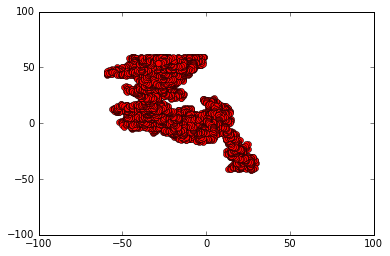

In [141]:
origin = Location(0, 0)
processDrunkers(SWField, origin, 10000)

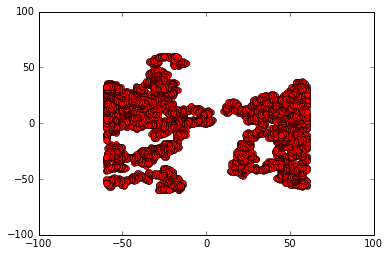

In [142]:
origin = Location(0, 0)
processDrunkers(SPField, origin, 10000)

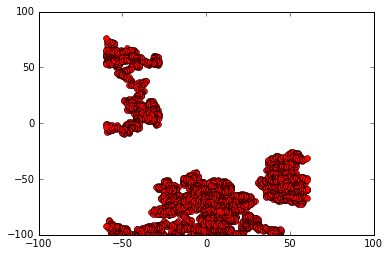

In [147]:
# NOT CORRECT
origin = Location(-60, 60)
processDrunkers(WWField, origin, 10000)

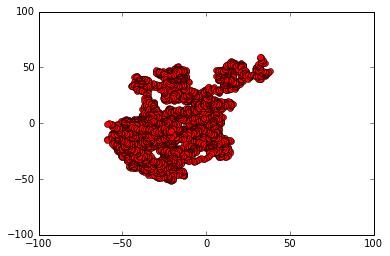

In [145]:
origin = Location(-60, 60)
processDrunkers(BHField, origin, 10000)

### Problem 4-8

(1 point possible)<br>
<img src='imgs/images_blue.jpeg', width="40%"/>

Answer: 

### Problem 4-9

(1 point possible)<br>
<img src='imgs/images_yellow.jpeg', width="40%"/>

Answer: 

### Problem 4-10

(1 point possible)<br>
<img src='imgs/images_red.jpeg', width="40%"/>

Answer: 

### Problem 4-11

(1 point possible)<br>
<img src='imgs/images_green.jpeg', width="40%"/>

Answer: 